## CS3570 Introduction to Multimedia Technology 
### Homework 01    Due: 11:59pm, 3/25/2025


### Reminder

- **You are not allowed to use any function that directly generates the result for each step, except for those provided by us.**
- **Your code must display and output your results to enable us to verify its correctness.**
- **Please follow the instructions in the Jupyter Notebook and complete the parts marked as `"TODO."`**
- **If you encounter any problems or have questions, please post them on eeclass.**
- **Rename your Jupyter Notebook file to `Homework_01_xxxxxxxxx_ooo.ipynb`, where `xxxxxxxxx` is your ID and `ooo` is your name. Ensure you upload it to eeclass before the deadline.**
- **Homework should be submitted before the announced due time. Scores of late homework will be reduced by 20% per day.**


---

## **1. Image Resampling (30%)**
### Implement an image resampling function to **downsample** an image to **1/8th** of its original width and height, then **upsample it back to its original size**. You will apply this to **two different images**, `cat.png` (easier) and `logo.png` (harder), and compare the results.
### (You should not use any built-in function for interpolation.)  

 - (a) Implement **Nearest-neighbor (NN) interpolation** to perform both downsampling and upsampling. Apply this to both `cat.png` and `logo.png`, then display the final restored images. (10%)
 - (b) Implement **Bilinear interpolation** to perform both downsampling and upsampling. Apply this to both `cat.png` and `logo.png`, then display the final restored images. (10%)
 - (c) Compare results from the first and second method. Discuss the differences in image quality and artifacts observed. (10%)


In [2]:
# Install the necessary libraries
# !pip install opencv-python numpy matplotlib

# Import the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
    

### Section (a) Nearest Neighbor Interpolation

In [3]:
# Section (a) Nearest-Neighbor Interpolation
def downsample(image, scale=8):
    """Downsamples an image by a given scale factor"""
    h, w, c = image.shape
    new_h, new_w = h // scale, w // scale
    downsampled = np.zeros((new_h, new_w, c), dtype=image.dtype)
    for i in range(new_h):
        for j in range(new_w):
            downsampled[i, j] = image[i * scale, j * scale]
    return downsampled

def upsample_nearest(image, original_shape):
    """Upsamples an image to its original shape using nearest-neighbor interpolation."""
    # TODO
    height, width, channels = original_shape
    downsampled_height, downsampled_width, _ = image.shape
    scale = height // downsampled_height
    
    upsample = np.zeros(original_shape, dtype=image.dtype)
    
    for i in range(height):
        for j in range(width):
            src_i = min(int(i / scale), downsampled_height -1)
            src_j = min(int(j / scale), downsampled_width -1)
            upsample[i, j] = image[src_i, src_j]
    return upsample
    pass


### Section (b) Bilinear Interpolation

In [26]:
# Section (b) Bilinear Interpolation
def upsample_bilinear(image, original_shape):
    """Upsamples an image to its original shape using bilinear interpolation."""
    # TODO
    height, width, channels = original_shape
    downsampled_height, downsampled_width, _ = image.shape
    scale_y = height // downsampled_height
    scale_x = width // downsampled_width
    print(downsampled_height, downsampled_width)
    print(scale_y, scale_x)
    
    upsampled = np.zeros(original_shape, dtype=image.dtype)
    for i in range(height):
        for j in range(width):
            # from the original image map to the downsampled image
            downsampled_x = i // scale_y
            downsampled_y = j // scale_x
            
            # find the 4 target point
            x1, y1 = min(int(np.floor(downsampled_x)), downsampled_width - 2), min(int(np.floor(downsampled_y)), downsampled_height - 1)
            x2, y2 = min(int(np.ceil(downsampled_x)), downsampled_width - 2), min(int(np.ceil(downsampled_y)), downsampled_height - 1)
            # print(x1, y1, x2, y2)
            weightY2 = downsampled_y - y1
            weightY1 = 1 - weightY2
            weightX2 = downsampled_x - x1
            weightX1 = 1 - weightX2
            
            for c in range(channels):
                val = (weightX1 * weightY1 * image[y1, x1, c]+
                       weightX2 * weightY1 * image[y1, x2, c]+
                       weightX1 * weightY2 * image[y2, x1, c]+
                       weightX2 * weightY2 * image[y2, x2, c])
                upsampled[i, j, c] = val
    upsampled = upsampled.astype(image.dtype)
    return upsampled
    
    pass

### Section (c) :
  > (Add your observation here)

### Visualize

80 128
8 8
100 100
8 8


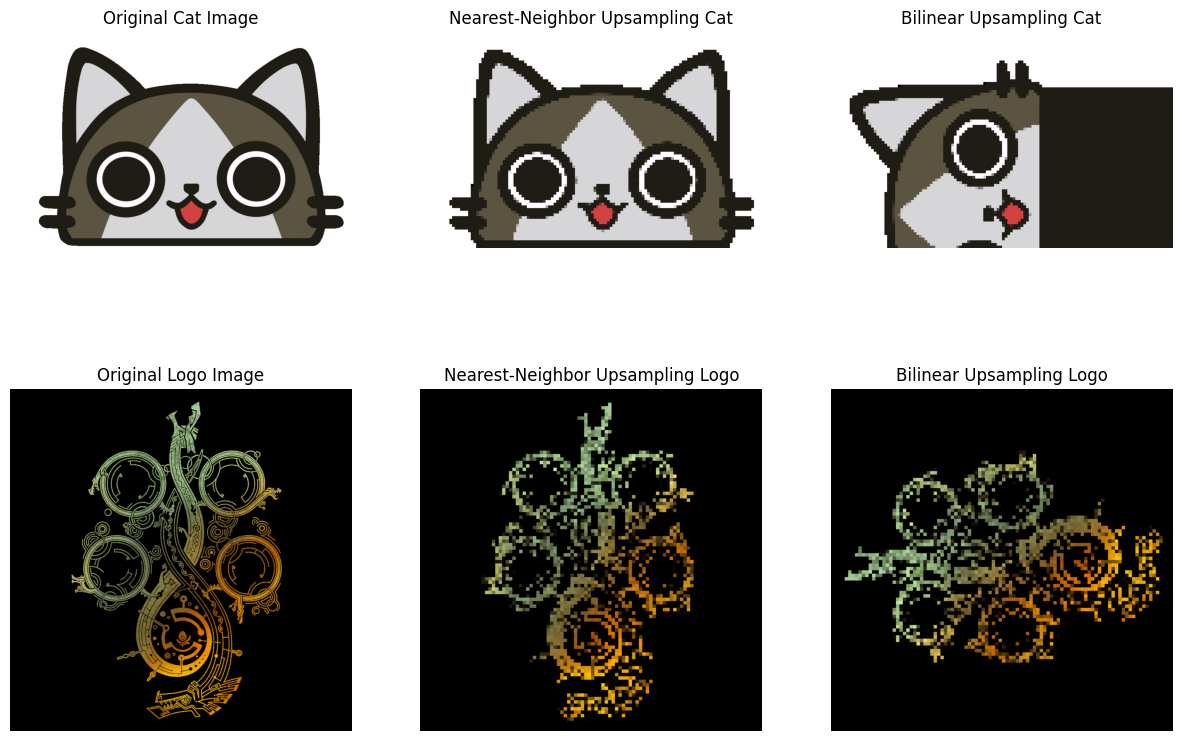

In [27]:
# Load an image
image_cat = cv2.imread('cat.png')
image_cat = cv2.cvtColor(image_cat, cv2.COLOR_BGR2RGB)  # Convert to RGB format
image_logo = cv2.imread('logo.png')
image_logo = cv2.cvtColor(image_logo, cv2.COLOR_BGR2RGB)  # Convert to RGB format


downsampled_image_cat = downsample(image_cat)
upsampled_nn_image_cat = upsample_nearest(downsampled_image_cat, image_cat.shape)
upsampled_bilinear_image_cat = upsample_bilinear(downsampled_image_cat, image_cat.shape)
downsampled_image_logo = downsample(image_logo)
upsampled_nn_image_logo = upsample_nearest(downsampled_image_logo, image_logo.shape)
upsampled_bilinear_image_logo = upsample_bilinear(downsampled_image_logo, image_logo.shape)

# Show results
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(image_cat)
axs[0, 0].set_title("Original Cat Image")
axs[0, 0].axis("off")

axs[0, 1].imshow(upsampled_nn_image_cat)
axs[0, 1].set_title("Nearest-Neighbor Upsampling Cat")
axs[0, 1].axis("off")

axs[0, 2].imshow(upsampled_bilinear_image_cat)
axs[0, 2].set_title("Bilinear Upsampling Cat")
axs[0, 2].axis("off")

axs[1, 0].imshow(image_logo)
axs[1, 0].set_title("Original Logo Image")
axs[1, 0].axis("off")

axs[1, 1].imshow(upsampled_nn_image_logo)
axs[1, 1].set_title("Nearest-Neighbor Upsampling Logo")
axs[1, 1].axis("off")

axs[1, 2].imshow(upsampled_bilinear_image_logo)
axs[1, 2].set_title("Bilinear Upsampling Logo")
axs[1, 2].axis("off")

plt.show()

## **2. Photo Enhancement (30%)**

### You are required to enhance the image **"scene_dark.jpg"** by following these steps.  
### Do not use any built-in functions to perform the enhancement procedure.

 - (a) Convert the image from **RGB color space to YIQ** and display the histogram of the **Y channel**. (10%)
 - (b) Apply **Gamma Transform** to the Y channel using an appropriate gamma value. (5%)
 - (c) Convert the modified image back from **YIQ to RGB**, and display the enhanced image along with the histogram of the Y channel. (5%)
 - (d) Compare the original and enhanced images along with their histograms. Discuss your observations regarding the differences and improvements. (10%)


### Section (a) Color space convertion

In [ ]:
# RGB to YIQ
def rgb_to_yiq(image):
    # TODO
    pass

# Load the dark image
dark_image = cv2.imread("scene_dark.jpg")
dark_image = cv2.cvtColor(dark_image, cv2.COLOR_BGR2RGB)

# Step (a): Convert RGB to YIQ
yiQ_img = rgb_to_yiq(dark_image)

### Section (b) Gamma Transformation

In [ ]:
# Gamma Transformation
def gamma_transform(image, gamma):
    # TODO
    pass

gamma = 0.4     # Choose an appropriate gamma value
yiQ_gamma_img = gamma_transform(yiQ_img.copy(), gamma)

### Section (c) Modified YIQ to RGB

In [ ]:
# YIQ to RGB
def yiq_to_rgb(image):
    # TODO
    pass

enhanced_img = yiq_to_rgb(yiQ_gamma_img)

### Section (d) :
  > (Add your observation here)

### Visualize

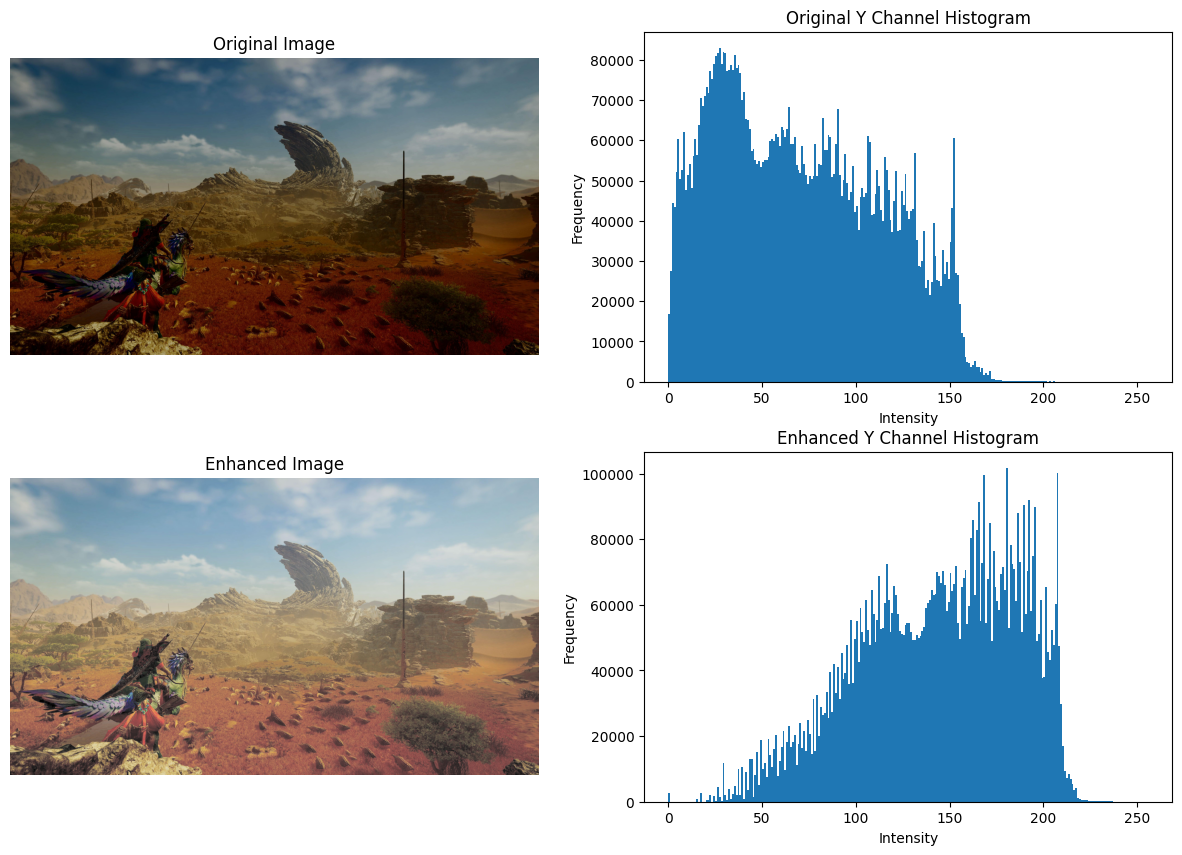

In [8]:
# Display results
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].imshow(dark_image)
axs[0, 0].set_title("Original Image")
axs[0, 0].axis("off")

axs[0, 1].hist(yiQ_img[..., 0].ravel(), bins=256, range=(0, 256))
axs[0, 1].set_title("Original Y Channel Histogram")
axs[0, 1].set_xlabel("Intensity")
axs[0, 1].set_ylabel("Frequency")

axs[1, 0].imshow(enhanced_img)
axs[1, 0].set_title("Enhanced Image")
axs[1, 0].axis("off")

axs[1, 1].hist(yiQ_gamma_img[..., 0].ravel(), bins=256, range=(0, 256))
axs[1, 1].set_title("Enhanced Y Channel Histogram")
axs[1, 1].set_xlabel("Intensity")
axs[1, 1].set_ylabel("Frequency")

plt.show()

## **3. Color Quantization and Dithering (40%)**  
### Implement the following steps to **reduce the number of colors in an image** using **median-cut color quantization** and **error diffusion dithering**.
### (**You cannot use built-in functions for these procedures** except for basic image input/output.)

 - (a) Implement **median-cut color quantization** to reduce the color depth of the input image to **5-bit (32 colors)**. Display the output images for both cases. (15%)
 - (b) Apply **error diffusion dithering** to the quantized images to **reduce color banding artifacts**. Display the dithered output images.  (15%)
 - (c) Visually analyze the results before and after dithering. Compare the images in terms of **color accuracy, smoothness, and introduced artifacts**. Discuss how dithering affects perceptual quality and whether it improves or degrades the image. Use observations from the images themselves rather than numerical metrics. (10%)

### Section (a) Median-Cut Color Quantization

In [ ]:
# Median-cut color quantization
def median_cut_quantize(img, depth):
    # TODO
    pass

### Section (b) Error Diffusion Dithering

In [ ]:
# Error diffusion dithering
def error_diffusion_dither(img, palette):
    # TODO
    pass

### Section (c) :
  > (Add your observation here)

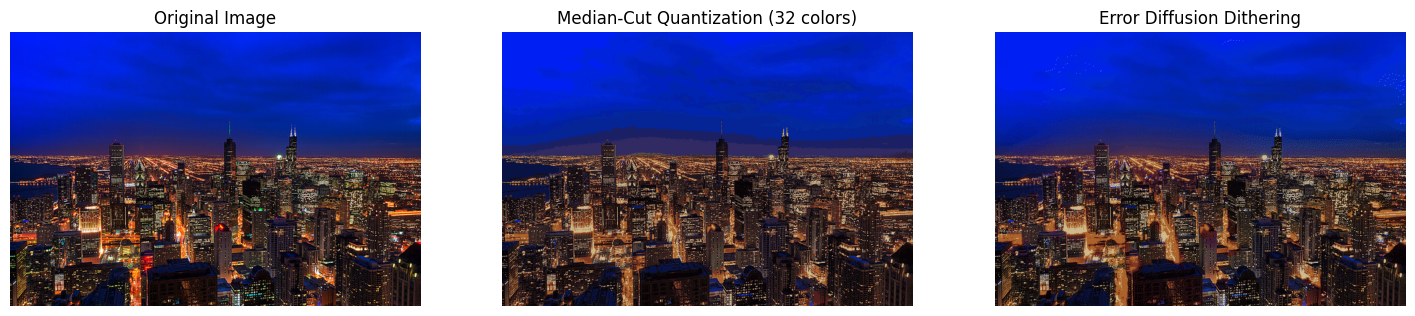

In [11]:
image = cv2.imread('cityscape.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# (a) Median-cut quantization to 32 colors (5-bit)
quantized_img = median_cut_quantize(image, depth=5)

# (b) Error diffusion dithering on quantized image
palette = np.unique(quantized_img.reshape(-1, 3), axis=0)
dithered_img = error_diffusion_dither(image, palette)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(quantized_img)
axes[1].set_title('Median-Cut Quantization (32 colors)')
axes[1].axis('off')

axes[2].imshow(dithered_img)
axes[2].set_title('Error Diffusion Dithering')
axes[2].axis('off')

plt.show()
